# <font color='#eb3483'> Exploratory Data Analysis </font>


## How to perform Exploratory Data Analysis?  

This is one a question that everyone is keen on knowing the answer to. Well, the answer is it depends on the data set that you are working on. There is no one method or common methods in order to perform EDA. However, there are a few set steps that this generally includes:  
1. Loading and inspecting your data
1. Cleaning the data which includes:  
   2.1. dropping data points and columns we don't need.   
   2.2. checking data types and fixing if needed  
   2.3. removing duplicates  
   2.4. dealing with missing values  
   2.5. looking for outliers and deciding how to deal with these  
   2.6. reformatting columns if needed

1. Some visual exploration to look at relationships between variables or interesting insights that jump out. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more.   

1. How can you add, change or remove features to get more out of your data? (aka Feature engineering)

# <font color='#eb3483'> AirBnB Cape Town </font>




### Background


http://insideairbnb.com/get-the-data.html


* What can we say about the prices of air bnbs in Cape Town.   
* Are there certain neighbourhoods that are more expensive.   
* Do properties with higher ratings charge more?  
* Does more rooms mean more money?

This is a great place to start digging in to these questions or generating hypotheses, with data on the price, neighbourhood, layout and ratings per air bnb rental.

In [6]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
#seaborn is data visualization
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
#mathplotlib is for visuals
%matplotlib inline
#puts it inline with the code

## <font color='#eb3483'> 1. Loading and inspect your data </font>


In [7]:
# import the data
df = pd.read_csv("data/listings_ct.csv")
df.head()

,id,name,summary,host_id,host_url,host_name,host_since,host_about,neighbourhood_cleansed,city,...,bed_type,square_feet,price,cleaning_fee,minimum_nights,maximum_nights,minimum_minimum_nights,minimum_maximum_nights,number_of_reviews,review_scores_rating
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",3754,https://www.airbnb.com/users/show/3754,Brigitte,10/21/08,I'm single and love to travel and meeting peop...,Ward 57,Southern Suburbs,...,Real Bed,NaN,819,261.0,3,730,3,730,54,97.0
1,15007,Blaauwberg House,Welcome to our self-catering beach-front famil...,59072,https://www.airbnb.com/users/show/59072,Dirk,12/1/09,Proud to live in the beautiful city of Cape To...,Ward 23,Cape Town,...,Real Bed,NaN,2050,850.0,2,120,2,120,27,97.0
2,15068,Grande Bay,Modern spacious apartment. Three bedrooms two...,59318,https://www.airbnb.com/users/show/59318,Linda,12/2/09,NaN,Ward 23,Cape Town,...,Real Bed,NaN,2804,650.0,4,730,4,730,0,NaN
3,15077,Top relaxed beach living in style,Situated either on the ground floor with direc...,59342,https://www.airbnb.com/users/show/59342,Georg,12/2/09,challenge us please! we love to perform!,Ward 4,Cape Town,...,Real Bed,NaN,1620,NaN,5,1125,5,1125,5,100.0
4,15180,The Melkbaai - Beachfront,Comfortable and safe self catering flat for 2 ...,59663,https://www.airbnb.com/users/show/59663,Heinri,12/3/09,NaN,Ward 83,Cape Town,...,Real Bed,NaN,575,200.0,2,730,2,730,0,NaN


What other commands can we use to have a high level glance at our data frame?

In [8]:
df.shape

(24220, 29)

In [9]:
df.dtypes

id                          int64
name                       object
summary                    object
host_id                     int64
host_url                   object
host_name                  object
host_since                 object
host_about                 object
neighbourhood_cleansed     object
city                       object
zipcode                    object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
bed_type                   object
square_feet               float64
price                       int64
cleaning_fee              float64
minimum_nights              int64
maximum_nights              int64
minimum_minimum_nights      int64
minimum_maximum_nights      int64
number_of_reviews           int64
review_scores_rating      float64
dtype: object

In [10]:
df.describe()

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,cleaning_fee,minimum_nights,maximum_nights,minimum_minimum_nights,minimum_maximum_nights,number_of_reviews,review_scores_rating
count,2.422000e+04,2.422000e+04,24220.000000,24220.000000,24220.000000,24205.000000,24191.000000,24113.000000,72.000000,2.422000e+04,17155.000000,24220.000000,2.422000e+04,24220.000000,2.422000e+04,24220.000000,16953.000000
mean,2.400490e+07,9.894259e+07,-33.959593,18.475189,3.890917,1.737554,1.873093,2.402521,992.500000,3.459046e+03,339.986709,4.280347,1.132125e+03,3.998927,1.241287e+03,14.694013,94.581726
std,1.226971e+07,9.144712e+07,0.098511,0.124975,2.458221,1.230308,1.423601,1.997833,1413.885995,9.204979e+04,512.040432,14.367974,6.425653e+04,13.749825,6.425554e+04,29.833997,8.821071
min,3.191000e+03,1.687000e+03,-34.263630,18.320150,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,20.000000
25%,1.434373e+07,2.573078e+07,-34.019828,18.403620,2.000000,1.000000,1.000000,1.000000,269.000000,6.630000e+02,100.000000,1.000000,6.000000e+01,1.000000,1.600000e+02,0.000000,93.000000
50%,2.283376e+07,6.192133e+07,-33.933840,18.433585,4.000000,1.000000,1.000000,2.000000,600.000000,1.082000e+03,300.000000,2.000000,1.125000e+03,2.000000,1.125000e+03,3.000000,97.000000
75%,3.517835e+07,1.548229e+08,-33.910740,18.483885,5.000000,2.000000,3.000000,3.000000,1076.000000,2.009000e+03,450.000000,4.000000,1.125000e+03,3.000000,1.125000e+03,14.000000,100.000000
max,4.353732e+07,3.471176e+08,-33.514810,18.940700,40.000000,50.000000,50.000000,50.000000,6458.000000,1.000000e+07,40000.000000,1125.000000,1.000000e+07,1125.000000,1.000000e+07,423.000000,100.000000


In [11]:
df.columns

Index(['id', 'name', 'summary', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_about', 'neighbourhood_cleansed', 'city', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'square_feet', 'price',
       'cleaning_fee', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'minimum_maximum_nights', 'number_of_reviews',
       'review_scores_rating'],
      dtype='object')

In [12]:
df.nunique()
#get the number of unique values for each coloumn

id                        24079
name                      23496
summary                   21885
host_id                   14876
host_url                  14876
host_name                  5413
host_since                 2992
host_about                 7108
neighbourhood_cleansed       99
city                        290
zipcode                     146
latitude                  15096
longitude                 14285
property_type                42
room_type                     4
accommodates                 19
bathrooms                    34
bedrooms                     21
beds                         31
bed_type                      5
square_feet                  46
price                      1902
cleaning_fee                607
minimum_nights               59
maximum_nights              200
minimum_minimum_nights       58
minimum_maximum_nights      175
number_of_reviews           253
review_scores_rating         47
dtype: int64

In [13]:
df.room_type.unique()
# shows the unique values, get a sense of the different types

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

<hr>

## <font color='#eb3483'> 2. Clean the data </font>

Some (but potentially not all) steps to take
2.  Cleaning the data which includes:  
   2.1. dropping columns we don't need  
   2.2. removing duplicates  
   2.3. checking data types and fixing if needed  
   2.4. dealing with missing values  
   2.5. looking for outliers and deciding how to deal with these



## <font color='#eb3483'> 2.1. Drop columns we dont need </font>


In [14]:
# removing uneeded columns - lets have a browse through see what we can probably remove
df.head()

,id,name,summary,host_id,host_url,host_name,host_since,host_about,neighbourhood_cleansed,city,...,bed_type,square_feet,price,cleaning_fee,minimum_nights,maximum_nights,minimum_minimum_nights,minimum_maximum_nights,number_of_reviews,review_scores_rating
0,3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...",3754,https://www.airbnb.com/users/show/3754,Brigitte,10/21/08,I'm single and love to travel and meeting peop...,Ward 57,Southern Suburbs,...,Real Bed,NaN,819,261.0,3,730,3,730,54,97.0
1,15007,Blaauwberg House,Welcome to our self-catering beach-front famil...,59072,https://www.airbnb.com/users/show/59072,Dirk,12/1/09,Proud to live in the beautiful city of Cape To...,Ward 23,Cape Town,...,Real Bed,NaN,2050,850.0,2,120,2,120,27,97.0
2,15068,Grande Bay,Modern spacious apartment. Three bedrooms two...,59318,https://www.airbnb.com/users/show/59318,Linda,12/2/09,NaN,Ward 23,Cape Town,...,Real Bed,NaN,2804,650.0,4,730,4,730,0,NaN
3,15077,Top relaxed beach living in style,Situated either on the ground floor with direc...,59342,https://www.airbnb.com/users/show/59342,Georg,12/2/09,challenge us please! we love to perform!,Ward 4,Cape Town,...,Real Bed,NaN,1620,NaN,5,1125,5,1125,5,100.0
4,15180,The Melkbaai - Beachfront,Comfortable and safe self catering flat for 2 ...,59663,https://www.airbnb.com/users/show/59663,Heinri,12/3/09,NaN,Ward 83,Cape Town,...,Real Bed,NaN,575,200.0,2,730,2,730,0,NaN


In [15]:
#use unique command to check out whats in a column if needed
df.bed_type.unique()

array(['Real Bed', 'Futon', 'Airbed', 'Pull-out Sofa', 'Couch'],
      dtype=object)

In [16]:
# First step is to clean the data and see which are the redundant or unnecessary cols
df = df.drop(["summary", "name","host_url", "host_id","host_name", "square_feet","host_about", "minimum_minimum_nights", "minimum_maximum_nights"], axis=1)
df.head()

,id,host_since,neighbourhood_cleansed,city,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,3191,10/21/08,Ward 57,Southern Suburbs,7700,-33.94739,18.47600,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,819,261.0,3,730,54,97.0
1,15007,12/1/09,Ward 23,Cape Town,7441,-33.80001,18.46063,House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,2050,850.0,2,120,27,97.0
2,15068,12/2/09,Ward 23,Cape Town,7441,-33.78799,18.46082,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,2804,650.0,4,730,0,NaN
3,15077,12/2/09,Ward 4,Cape Town,7441,-33.85812,18.49043,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,1620,NaN,5,1125,5,100.0
4,15180,12/3/09,Ward 83,Cape Town,7139,-34.11124,18.82349,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,575,200.0,2,730,0,NaN


In [17]:
# do we waant to rename any columns?
# lets rename neighbourhood_cleansed to neighbourhood

df = df.rename(columns={
    "neighbourhood_cleansed":"neighbourhood",
})
df.head()

,id,host_since,neighbourhood,city,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,3191,10/21/08,Ward 57,Southern Suburbs,7700,-33.94739,18.47600,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,819,261.0,3,730,54,97.0
1,15007,12/1/09,Ward 23,Cape Town,7441,-33.80001,18.46063,House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,2050,850.0,2,120,27,97.0
2,15068,12/2/09,Ward 23,Cape Town,7441,-33.78799,18.46082,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,2804,650.0,4,730,0,NaN
3,15077,12/2/09,Ward 4,Cape Town,7441,-33.85812,18.49043,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,1620,NaN,5,1125,5,100.0
4,15180,12/3/09,Ward 83,Cape Town,7139,-34.11124,18.82349,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,575,200.0,2,730,0,NaN


## <font color='#eb3483'> 2.2. Removing duplicates </font>


In [18]:
#Let's look for duplicate rows

print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)


(24220, 20)
(141, 20)


In [19]:
# whoooops! not cool - let's remove them. use keep first to not remove all the duplicates
df = df.drop_duplicates(keep='first')

print(df.shape)

(24079, 20)


## <font color='#eb3483'> 2.3. Check data types </font>


In [20]:
#lets have a quixk look at our data types
df.dtypes

id                        int64
host_since               object
neighbourhood            object
city                     object
zipcode                  object
latitude                float64
longitude               float64
property_type            object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
bed_type                 object
price                     int64
cleaning_fee            float64
minimum_nights            int64
maximum_nights            int64
number_of_reviews         int64
review_scores_rating    float64
dtype: object

In [21]:
#Any issues here?

In [22]:
# How about changing the host_since to DateTime column.

df.host_since = pd.to_datetime(df["host_since"])
print(df.dtypes)


id                               int64
host_since              datetime64[ns]
neighbourhood                   object
city                            object
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                            int64
cleaning_fee                   float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
dtype: object


/var/folders/dk/95f115l12ms7fs6v815_g44c0000gn/T/ipykernel_27024/1837946438.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.host_since = pd.to_datetime(df["host_since"])


In [23]:
#lets change host ID to an object. isnt really a number - its a category
# cant remember how - google is your friend.

In [24]:
df["id"]=df["id"].astype(object)
print(df.dtypes)

id                              object
host_since              datetime64[ns]
neighbourhood                   object
city                            object
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                            int64
cleaning_fee                   float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
dtype: object


## <font color='#eb3483'> 2.3. Missing values </font>


In [25]:
print(df.isnull().sum())
#look for missing values, finds the total number of missing values

id                         0
host_since                 3
neighbourhood              0
city                      54
zipcode                  665
latitude                   0
longitude                  0
property_type              0
room_type                  0
accommodates               0
bathrooms                 15
bedrooms                  29
beds                     107
bed_type                   0
price                      0
cleaning_fee            7033
minimum_nights             0
maximum_nights             0
number_of_reviews          0
review_scores_rating    7253
dtype: int64


### <font color='#eb3483'>Missigno </font>
This package let's us view how our missing data is spread out across rows and columns in a super convenient visual format (package found her: https://github.com/ResidentMario/missingno)

You can install this package by using `conda install -c conda-forge missingno`.

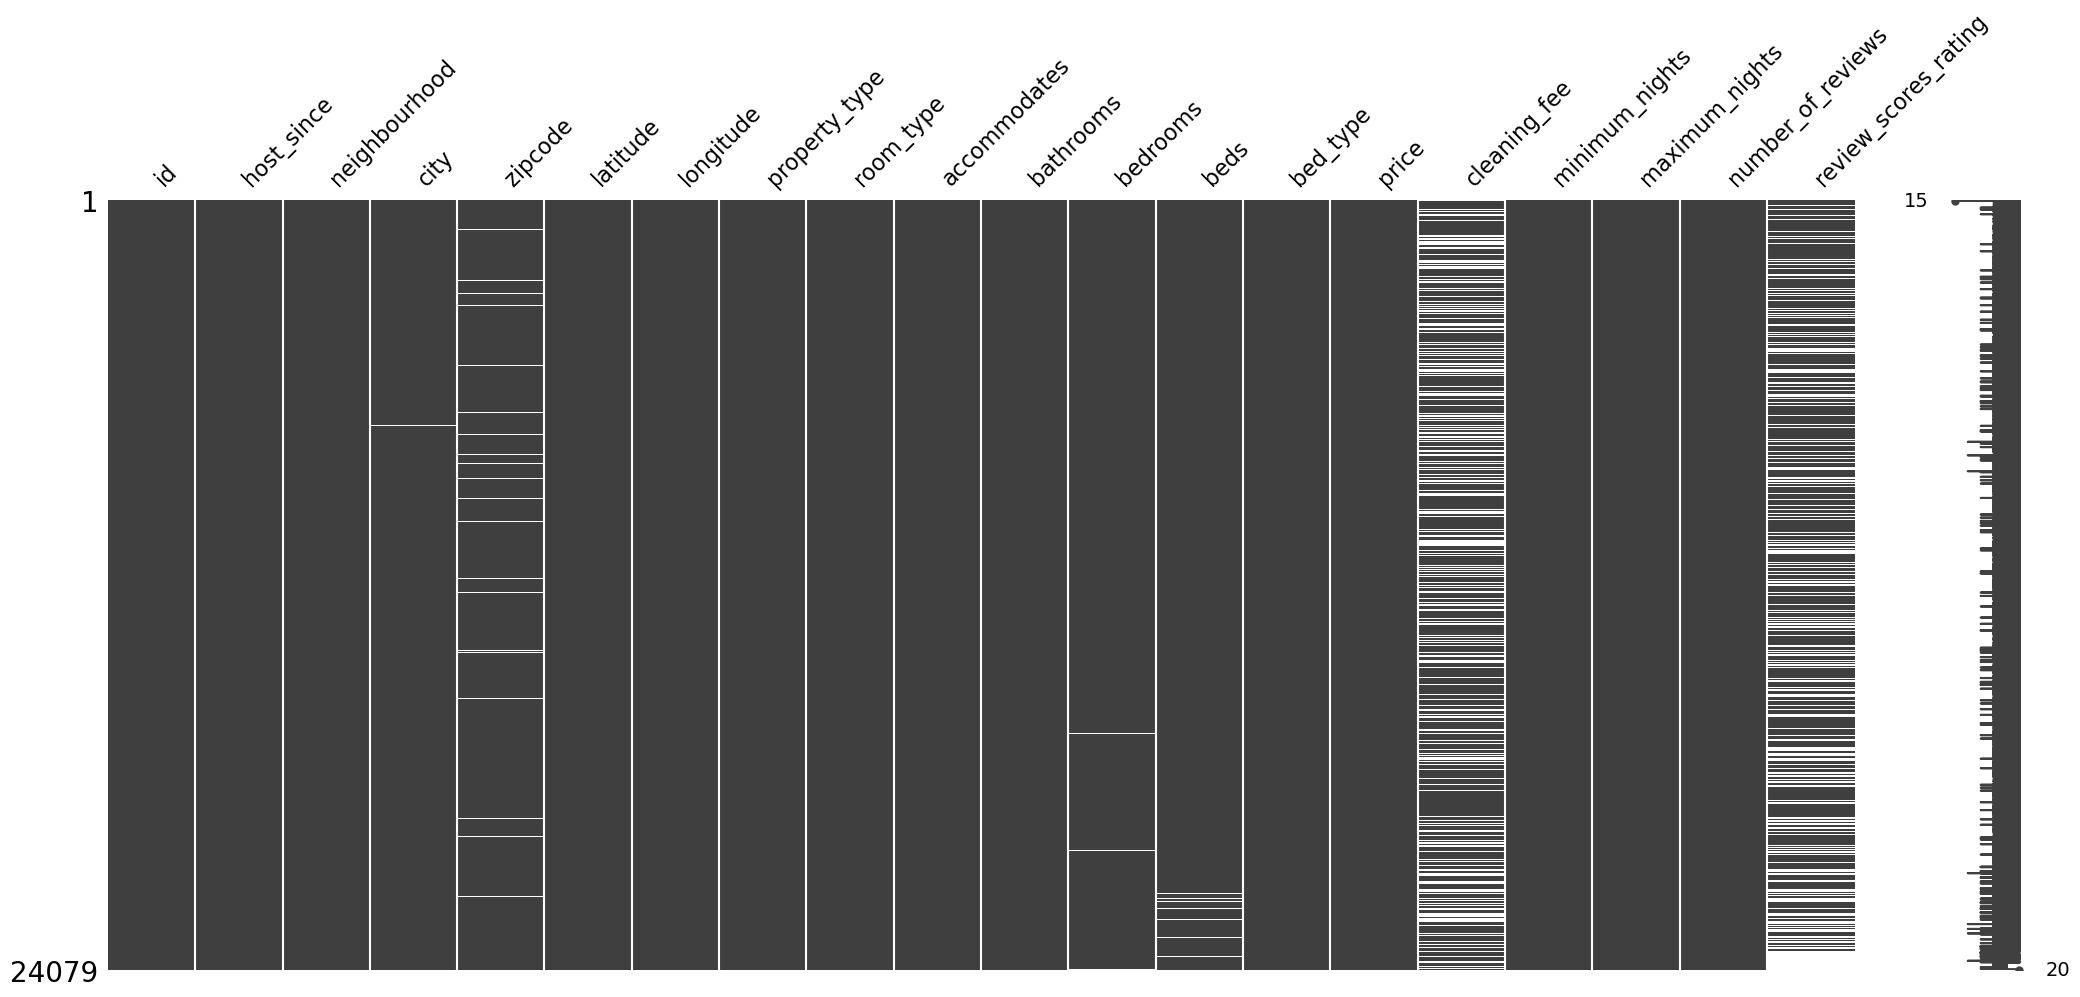

In [26]:
import missingno as msno

msno.matrix(df);
#visualize all the missing values

In [27]:
# what do we see here.

# square feet - doesnt look like there is much useable info here - so lets drop that one.
# cleaning fee - also quite a few missing values. - you can decide on this one. or maybe we impute the average cleaning fee for missing numbers.
df.drop(["cleaning_fee"], axis=1)



,id,host_since,neighbourhood,city,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,3191,2008-10-21,Ward 57,Southern Suburbs,7700,-33.94739,18.47600,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,819,3,730,54,97.0
1,15007,2009-12-01,Ward 23,Cape Town,7441,-33.80001,18.46063,House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,2050,2,120,27,97.0
2,15068,2009-12-02,Ward 23,Cape Town,7441,-33.78799,18.46082,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,2804,4,730,0,NaN
3,15077,2009-12-02,Ward 4,Cape Town,7441,-33.85812,18.49043,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,1620,5,1125,5,100.0
4,15180,2009-12-03,Ward 83,Cape Town,7139,-34.11124,18.82349,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,575,2,730,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24074,43523009,2020-01-30,Ward 62,Cape Town,7806,-34.03256,18.42937,Cottage,Entire home/apt,2,1.0,1.0,1.0,Real Bed,745,2,1125,0,NaN
24075,43524607,2019-09-28,Ward 107,Cape Town,7441,-33.81665,18.48378,House,Private room,12,5.0,6.0,6.0,Real Bed,348,3,130,0,NaN
24076,43531227,2018-12-02,Ward 113,Blouberg,7441,-33.82078,18.51737,House,Private room,2,1.0,1.0,1.0,Real Bed,592,1,90,0,NaN
24077,43532629,2017-04-04,Ward 59,Cape Town,7700,-33.96858,18.46876,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,401,1,30,0,NaN


What do we do about missing values ...
- Remove those records with missing values  
`df = df.dropna()`   
or  
`df = df.dropna(subset=["column2", "column5", "this_column", "that_column"])`  


- Replace the null values with a particular value, for example 0 or "missing". It is a simple technique but adds noise (because it assumes the null values are one specific case).  
`df["column1"] = df.column1.fillna("missing")`  
`df["this_column"] = vehicles.this_columns.fillna(0)`  


- Data Imputation: We can replace the missing values with a particular value, but use some criteria to choose that value. Common imputation practices are imputing with the mean, mode or median.

<Axes: >

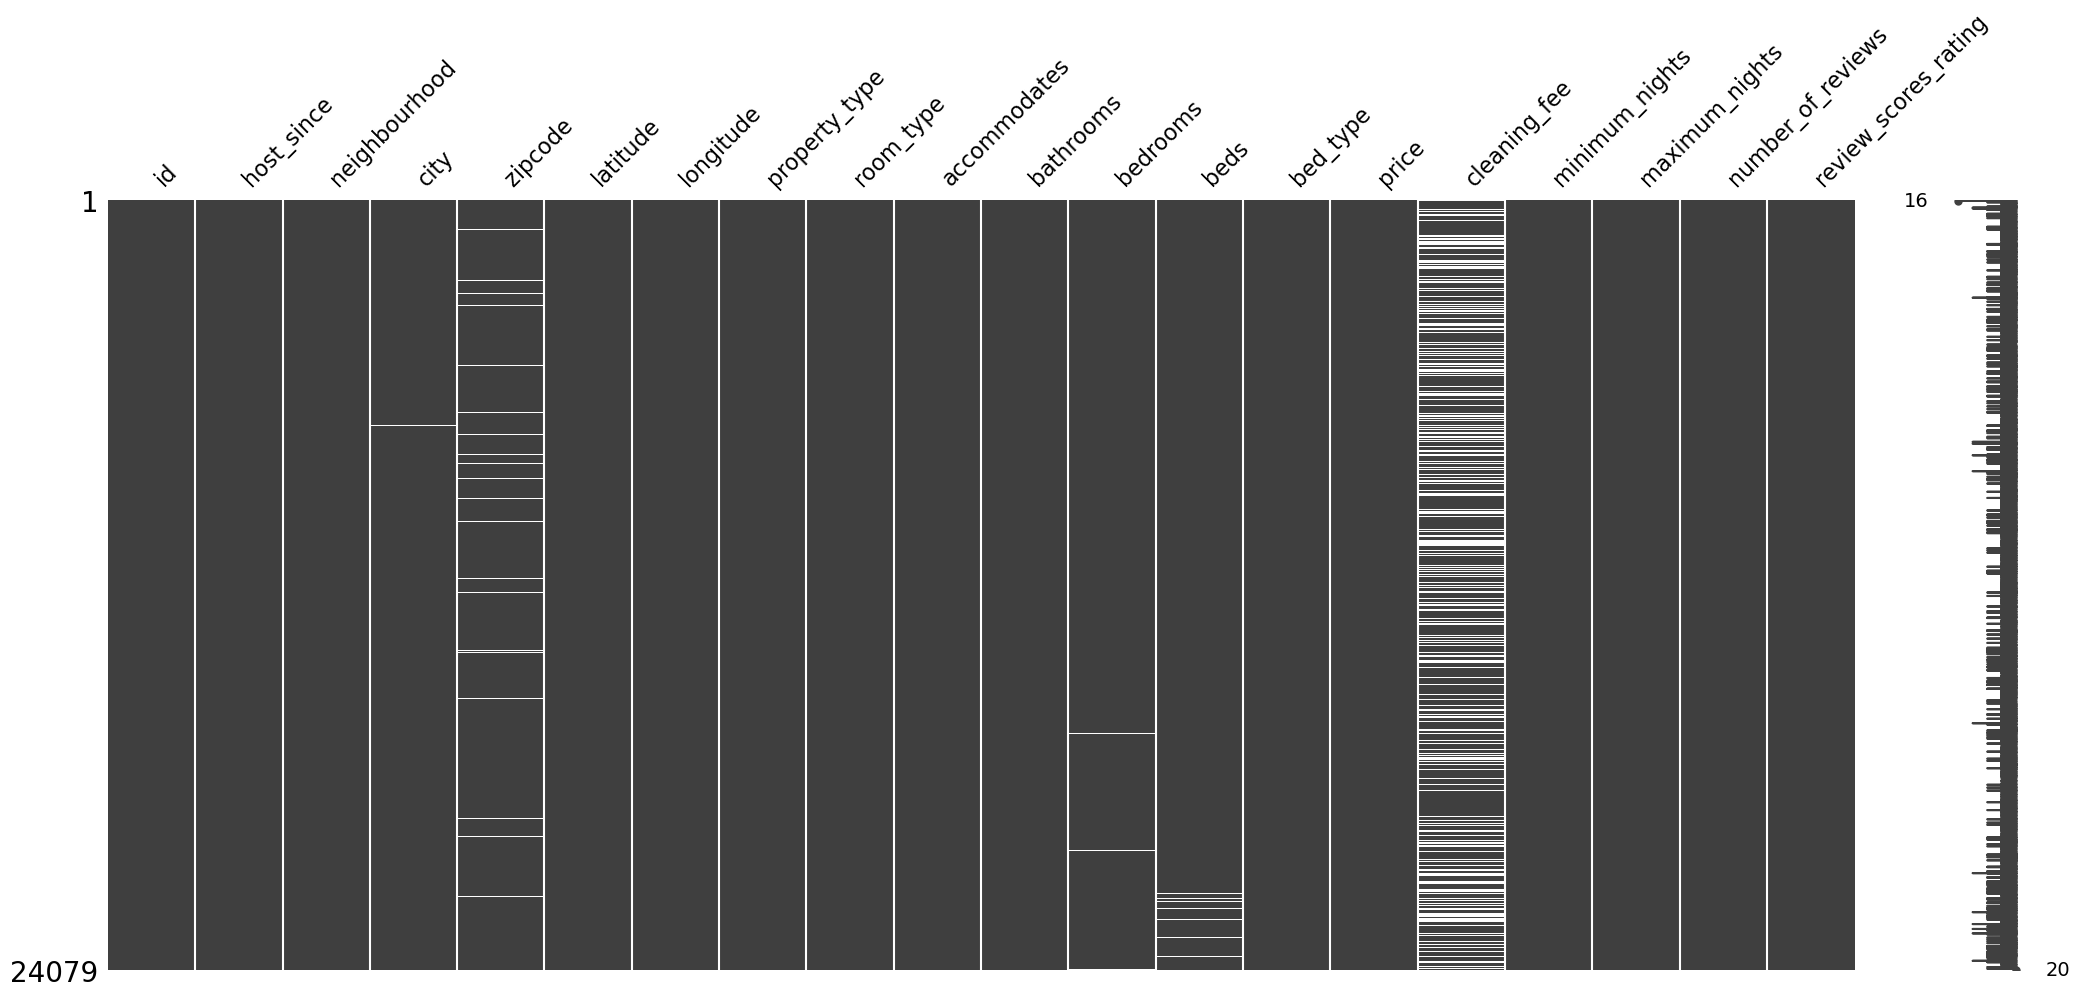

In [28]:
# impute missing values for cleaning fee - do distributions and impute with mean.
review_scores_rating_mean = df.review_scores_rating.mean()

df.review_scores_rating = df.review_scores_rating.fillna(review_scores_rating_mean)
msno.matrix(df)


There are other techniques to deal with missing values:

- Use a predictive model to predict the missing values.

- More sophisticated methods: [MICE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/) is a method that deals with missing values, and in this [repository](https://github.com/hammerlab/fancyimpute) there are more methods

[Here](https://gallery.cortanaintelligence.com/Experiment/Methods-for-handling-missing-values-1) there are more strategies

## <font color='#eb3483'> 2.4. Looking for and dealing with outliers </font>


In [29]:
df.dtypes

id                              object
host_since              datetime64[ns]
neighbourhood                   object
city                            object
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                            int64
cleaning_fee                   float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
dtype: object

In [30]:
# lets check out accommodates
df.accommodates.describe()

count    24079.000000
mean         3.890236
std          2.457453
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         40.000000
Name: accommodates, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


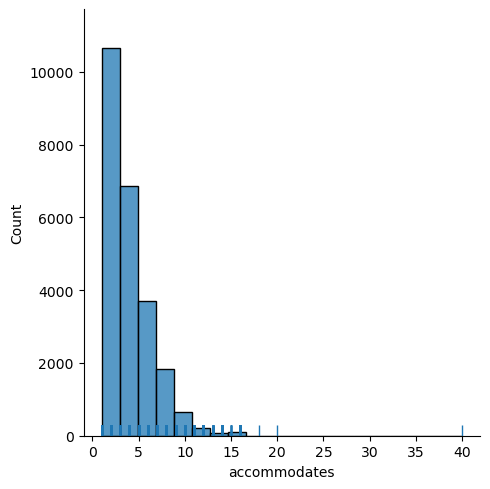

In [31]:
#make a histogram for accommodates
sns.displot(df.accommodates, bins=20, rug=True);

<Axes: >

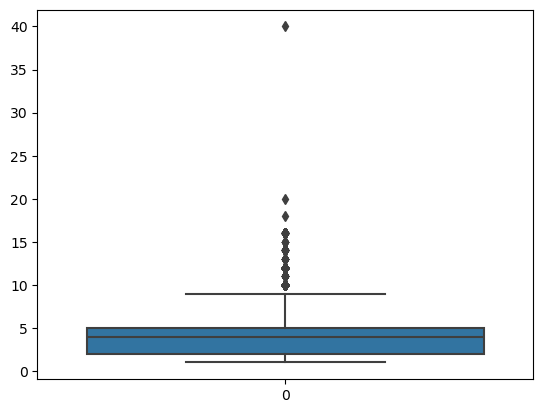

In [32]:
#make a boxplot for accommodates
sns.boxplot(df.accommodates)


In [33]:
# lets check out the unique values (always useful)
df.accommodates.unique()

array([ 2,  6,  4,  3, 12,  5,  8,  1,  7, 10,  9, 14, 16, 11, 13, 15, 18,
       20, 40])

In [34]:
# hmmmmm, 40 looks quite high. lets check this out ... is this a true outlier?
df[df.accommodates < 50000]

,id,host_since,neighbourhood,city,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,3191,2008-10-21,Ward 57,Southern Suburbs,7700,-33.94739,18.47600,Guesthouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,819,261.0,3,730,54,97.000000
1,15007,2009-12-01,Ward 23,Cape Town,7441,-33.80001,18.46063,House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,2050,850.0,2,120,27,97.000000
2,15068,2009-12-02,Ward 23,Cape Town,7441,-33.78799,18.46082,Apartment,Entire home/apt,6,2.0,3.0,5.0,Real Bed,2804,650.0,4,730,0,94.578093
3,15077,2009-12-02,Ward 4,Cape Town,7441,-33.85812,18.49043,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,1620,NaN,5,1125,5,100.000000
4,15180,2009-12-03,Ward 83,Cape Town,7139,-34.11124,18.82349,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,575,200.0,2,730,0,94.578093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24074,43523009,2020-01-30,Ward 62,Cape Town,7806,-34.03256,18.42937,Cottage,Entire home/apt,2,1.0,1.0,1.0,Real Bed,745,0.0,2,1125,0,94.578093
24075,43524607,2019-09-28,Ward 107,Cape Town,7441,-33.81665,18.48378,House,Private room,12,5.0,6.0,6.0,Real Bed,348,NaN,3,130,0,94.578093
24076,43531227,2018-12-02,Ward 113,Blouberg,7441,-33.82078,18.51737,House,Private room,2,1.0,1.0,1.0,Real Bed,592,NaN,1,90,0,94.578093
24077,43532629,2017-04-04,Ward 59,Cape Town,7700,-33.96858,18.46876,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,401,NaN,1,30,0,94.578093


In [35]:
#Check out price in the same way.

In [36]:
# what if we HAD LOTS OF VARIABLES and wanted to look at all the numerical values at once.
numerical = [
  'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating'
]

#could also pull out columns based on dtype
#numerical = df.select_dtypes(include=np.number) # different way of doing the above.


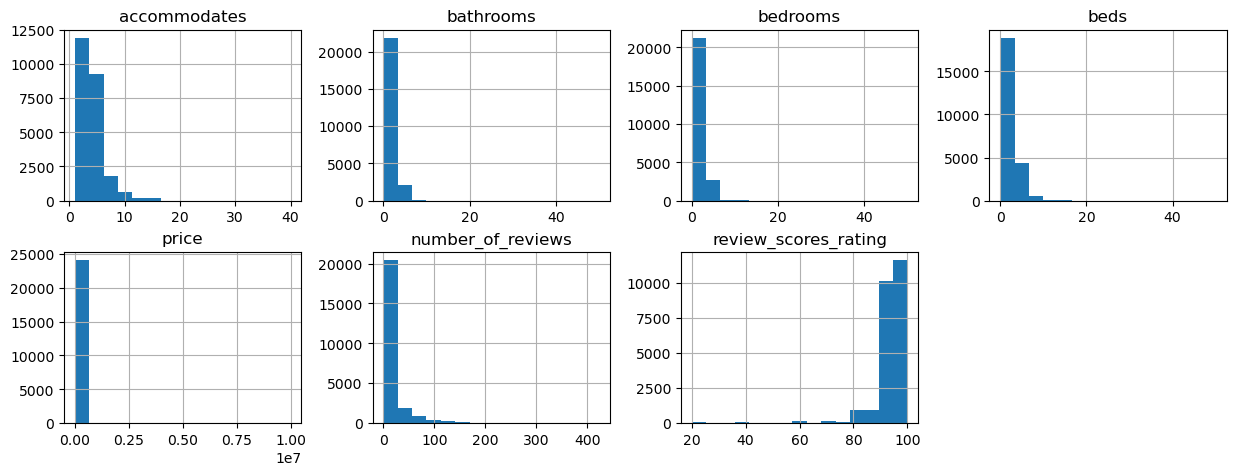

In [37]:
df[numerical].hist(bins=15, figsize=(15, 8), layout=(3, 4));

In [38]:
# Another fun way to view this is using widgets

In [39]:
from ipywidgets import interact, fixed

In [40]:
#Create our plotting function
def numerical_variable_distribution(df, col):
    df[col].plot.hist()

In [41]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
interact(numerical_variable_distribution,
         col=numerical_columns, df=fixed(df));

interactive(children=(Dropdown(description='col', options=('latitude', 'longitude', 'accommodates', 'bathrooms…

EXERCISE: In break out rooms investigate cleaning fee, number of reviews, bedrooms, batherooms, beds and review scores rating, for 10-15 mins come back and report what you found.

<hr>

In general, extreme values are those values that are different than the variable distribution, and estimating summary statistics for a column with outliers yields unreliable results.

One common practice is to consider outliers those values with a z score higher than 3 (that means, they are 3 standard deviations   bigger or smaller than the mean.

z score is defined as:

$$z(x)= \frac{x-\mu}{\sigma}$$

So you can always double check whether values fall above this for potential extreme outliers.

### How do we assess categorical variables ?

It is good practice to look at the categorical variables to get an idea of the cardinality - and how useful they might be in groupings or as predictive varaibles.


High cardinality =  variables with few repeated values (ie all different)
Low cardinality = many repeated values (ie almost all one type)



In [42]:
df.dtypes

id                              object
host_since              datetime64[ns]
neighbourhood                   object
city                            object
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                            int64
cleaning_fee                   float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
dtype: object

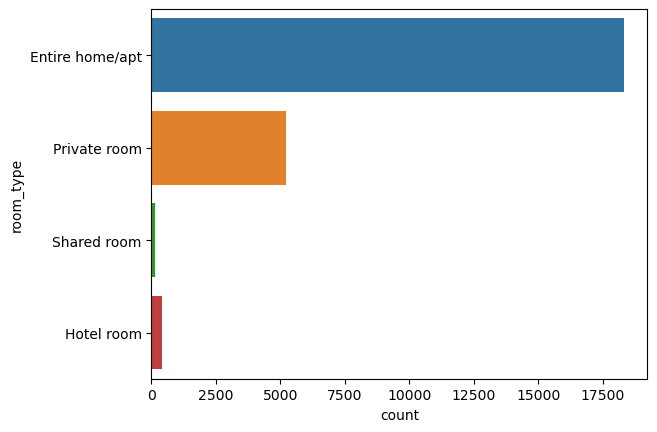

In [43]:
sns.countplot(y = df['room_type']);

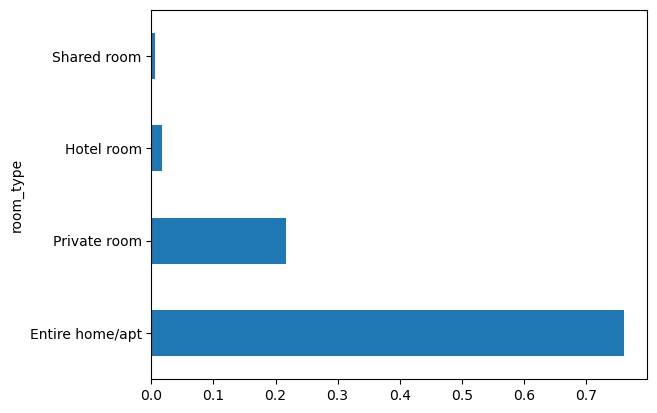

In [44]:
#Or we can view this as a ratio
df.room_type.value_counts(normalize=True).plot.barh(); # as a ratio

In [45]:
def categorical_variable_distribution(col):
    df[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh() # only pulls out 20 results.

In [46]:
categorical_columns = df.select_dtypes(
    ['object', 'category']).columns.tolist()

In [47]:
interact(categorical_variable_distribution, col=categorical_columns);

interactive(children=(Dropdown(description='col', options=('id', 'neighbourhood', 'city', 'zipcode', 'property…

<hr>

So what can we summarize from our above steps?

In [48]:
# most airbnbs are in ward 115 and 54
# most popular place to rent is apartments

### <font color='#eb3483'> Data Dictionary <font color='#eb3483'>

It is important to write down the description and datatypes of the variables.
(in our case it's pretty self explnatory but you may have done some major transformations and its good to try and keep track of them)  - especially for when sharing notebooks (think internships) or coming back to it months later.

* id            --                     int64  
* host_id         --                categorical  
* host_since       --               date
* neighbourhood      --             categorical  
* city        --                    categorical  
* zipcode      --                   categorical  
* latitude      --                 float64  
* longitude     --                 float64  
* property_type       --            categorical  
* room_type           --            categorical  
* accommodates        --             int64  
* bathrooms           --           float64  
* bedrooms             --          float64  
* beds                 --          float64  
* bed_type             --           categorical  
* price                --            int64  
* cleaning_fee         --          float64  
* number_of_reviews    --            int64  
* review_scores_rating  --         float64  




### <font color='#eb3483'> Data processing steps </font>
- There are xxx duplicate rows (we have removed them)
- The variables `xxx, xxx, xxx and xxx` have missing values - what did we do with these?
- The categorical variable `xxx, xxx` has a dominant class (65% of xxx are xxx, etc)
- There are outliers in the variables `xxx and xxx` - what did we do with these?


### <font color='#eb3483'> Variable Exploration Description <font color='#eb3483'>
(Distributions & Cardinality)  
Here we describe the possible entities(groupings) that we can break our dataset into, this will help us think of different ways to slice and group the dataset in further steps.

- Use neighbourhood or zipcode (but what does Neighbourhood mean).   
- Most common zipcode is 8001 and ward is 115.
- City was almost all Cape Town, so not very informative for differentiation (ie low cardinality).
- Property_type - whole houses and apartments are the most common type.
- Room_type -> a lot of entire apartments and shared rooms.
- bed type -> predominently real beds. Not much value in this variable.
- Accommodates - > good range of sizes of properties.


### <font color='#eb3483'>  Saving our data </font>
After each step it is important to save the dataset with a different name (so we dont modify the original).

In [49]:
df.to_csv("/Users/mollyrudisill/ix24_mollyr/ix_datascience-main/classwork/airbnb_processed.csv", index=False)

<hr>

### <font color='#eb3483'>An extra tit-bit: Pickling </font>


We usually export our datasets to csv, because it is a format that is easily readable in pretty much any platform.

However, CSV (`Comma Separated Values`) is a simple format, and when we export a dataframe to csv some of the information gets lost in translation, as categories will turn into text.

One way to avoid this is to save the dataframe into a native python format `pickle`. Saving a dataframe as a pickle file has two main advantages. One is that reading the dataframe is much faster, because python can read the file from the hard drive as a dataframe directly (pandas doesnt have to read a text file and convert it into a dataframe). The second advantage is that we keep all of the original column dtypes.

Pandas can read and write pickle files very easily (`read_pickle` and `to_pickle`).

In [50]:
df.to_pickle("/Users/mollyrudisill/ix24_mollyr/ix_datascience-main/classwork/airbnb_processed.pkl")